## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

#Tensorflow 설치하기
# !pip install Tensorflow

In [5]:
import tensorflow as tf

* 데이터 프레임 관련 라이브러리

In [41]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [2]:
df = pd.read_csv("df_train.csv", sep = ",")
x = df.drop("label", axis = 1)
y = df.loc[:, "label"]

### **다.  데이터 전처리**

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2021)

In [21]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
# 선언하기
model = DecisionTreeClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result = {}
result["Decision Tree"] = cv_score.mean()

평균 :  0.9372257850701491


In [35]:
# 선언하기
model = LogisticRegression(max_iter = 2399)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv=5)

# 결과확인
print('평균:', cv_score.mean())

# 결과수집
result['Logistic Regression'] = cv_score.mean()

평균: 0.850222976783669


In [36]:
# 선언하기
model = RandomForestClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result["Random Forest"] = cv_score.mean()

평균 :  0.9587164444651174


In [37]:
# 선언하기
model = XGBClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result["XGBoost"] = cv_score.mean()

평균 :  0.958715863039345


In [38]:
# 선언하기
model = LGBMClassifier(random_state = 1)

# 성능예측
cv_score = cross_val_score(model, x_train, y_train, cv = 5)

# 결과확인
print("평균 : ", cv_score.mean())

# 결과수집
result["LightGBM"] = cv_score.mean()

평균 :  0.9580350134600067


In [39]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

Decision Tree 0.937
Logistic Regression 0.85
Random Forest 0.959
XGBoost 0.959
LightGBM 0.958


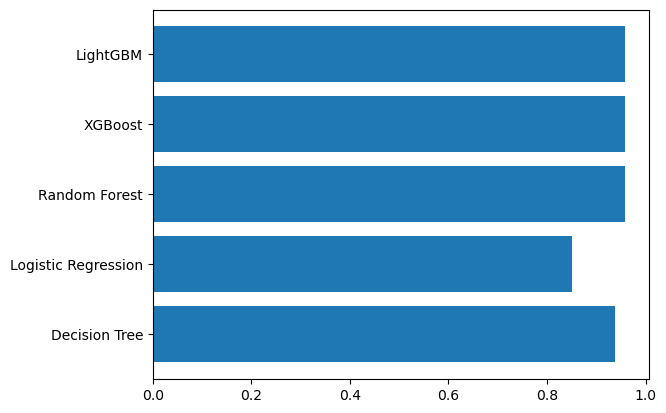

In [42]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

In [43]:
# 선언하기
model = XGBClassifier(random_state = 1)

# 3단계: 학습하기
model.fit(x_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[347  11]
 [  8 367]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       358
           1       0.97      0.98      0.97       375

    accuracy                           0.97       733
   macro avg       0.97      0.97      0.97       733
weighted avg       0.97      0.97      0.97       733

